# Logistic Regression

## Gradient Descent

The hypothesis function of logistic regression is defined as follows:

$$h_{\theta}(x) = \dfrac{1}{1+e^{\theta^{T}x}}$$

The cost function we will be using is the *log likelihood*. The goal is to **maximize** this value, so the implementation will be a gradient *ascent*.

$$l(\theta) = \sum_{x \in X}y\ ln(h_{\theta}(x))+(1-y)\ ln(1-h_{\theta}(x))$$

The gradient and update step is as follows:

$$\theta_{j}(k+1) = \theta_{j}(k)+\alpha \sum_{i=1}^{M}(y^{(i)}-h_{\theta}(x^{(i)}))x_j$$

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Create a toy dataset
X, y = make_classification(n_samples=100,
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           random_state=0)

In [3]:
data = pd.DataFrame(np.vstack((y, X.T)).T, columns=['Target', 'Feat1', 'Feat2'])
data.head()

,Target,Feat1,Feat2
0,0,-0.766055,0.183325
1,0,-0.920383,-0.072317
2,0,-0.986585,-0.286920
3,1,1.709102,-1.104540
4,1,1.987647,1.776245


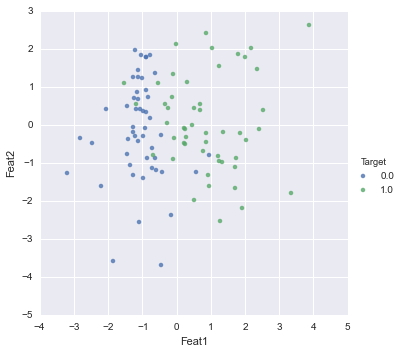

In [4]:
sns.lmplot(x="Feat1", y="Feat2", hue="Target", data=data, fit_reg= False, markers='o');

In [5]:
# Import home-made logistic regression function
from logistic_regression_functions import *
from gradient_ascent import GradientAscent

In [6]:
# save cost, gradient and prediction functions
cost = log_likelihood
gradient = log_likelihood_gradient
predict_func = predict

In [7]:
# Instantiate and run model on data
model = GradientAscent(cost, gradient, predict_func)
model.run(X, y, alpha=0.001, num_iterations=1000)

# model predictions
y_pred = model.predict(X)

print "*******************************"
print "Accuracy: ", accuracy(y,y_pred)
print "Precision: ", precision(y,y_pred)
print "Recall:", recall(y,y_pred)

Starting Gradient Ascent with theta = [-0.54699786  0.46673587] and cost = -1.03583681742
Running...
After 1000 iterations: theta = [ 2.66721053  0.59685954] and cost = -0.291125158646
*******************************
Accuracy:  0.89
Precision:  0.953488372093
Recall: 0.82


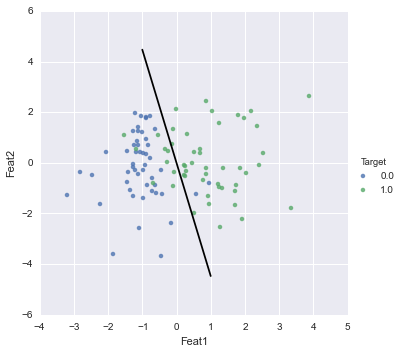

In [12]:
# graph the decision boundary 

#x = np.linspace(X.min(), X.max(), 100)
x = np.linspace(-1, 1, 100)
theta = model.coeffs

sns.lmplot(x="Feat1", y="Feat2", hue="Target", data=data, fit_reg= False, markers='o')
plt.plot(x,(-theta[0]/theta[1])*x, c = 'black')
plt.show()